In [12]:
import numpy as np
from matplotlib import pyplot as plt
import os

# Simulate two Isolated kinks and make a MOVIE (gif) of some observable over time
This files makes, in sequence
- Prepare a state with two isolated kinks (_initialization/twokinksinit.c_)
- Simulate the 1D TDGL equation with that initial state and the C(t) specified
- Measures (and plots as an animation) 
    - State $u(x)$ and its second derivative $u_{xx}(x)$ (to highlight kinks' positions) in **real-time**
    - The "height" of the plateau region between the kinks
    - The distance between the kinks
all as a function of time (animated).

N = 1280



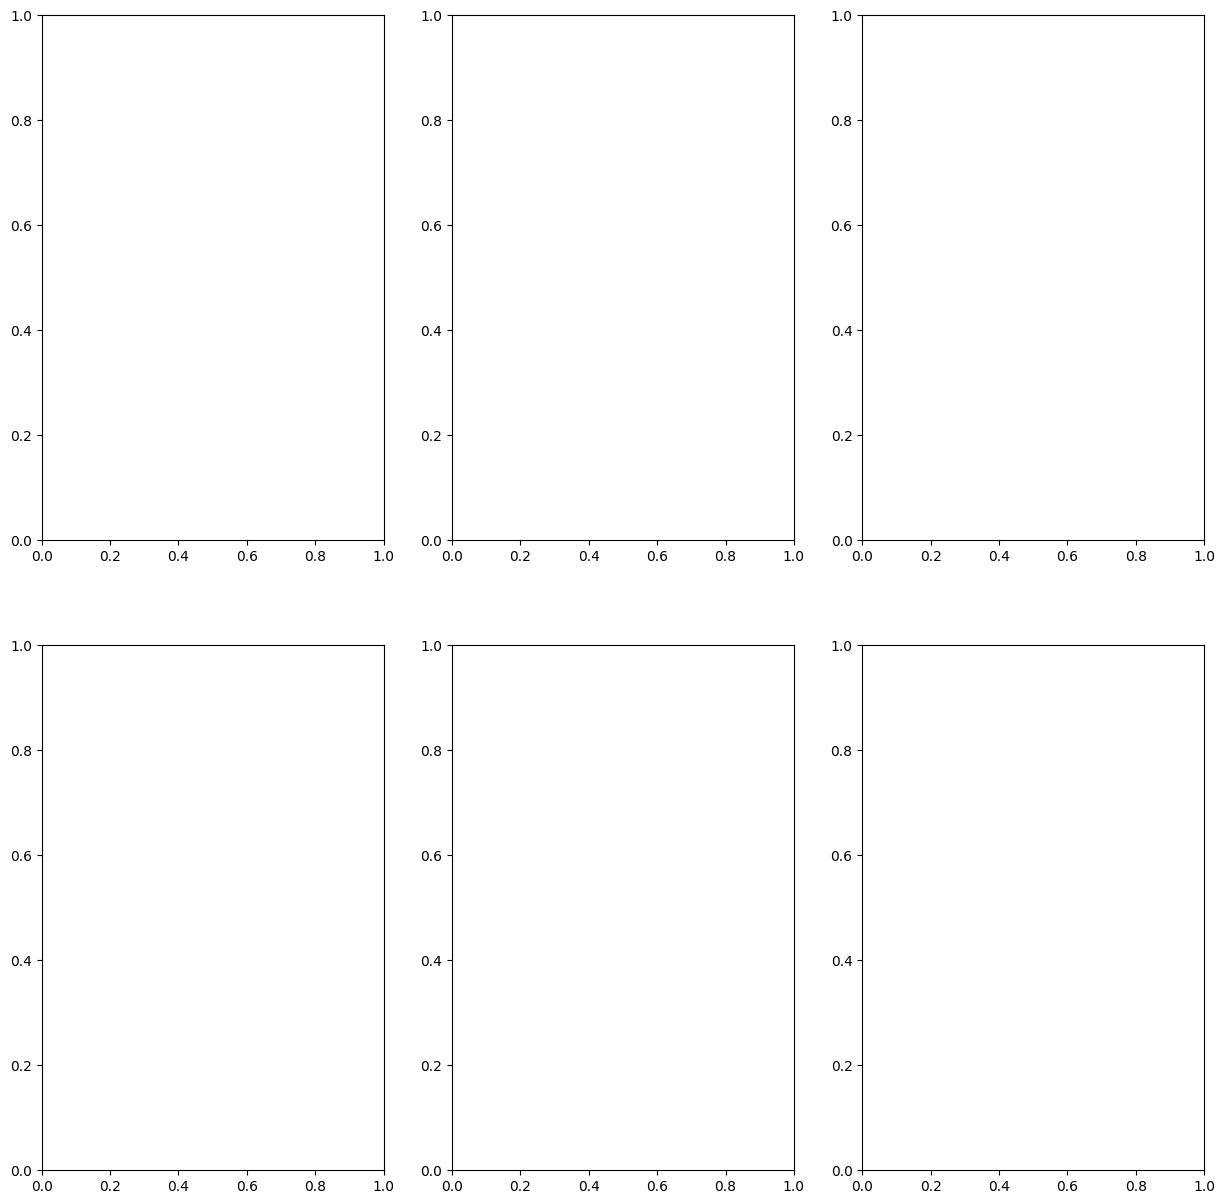

In [13]:
# Define C(t)
t_start_snapshot = 0

Cbar = 0.5
A = 1
T = 50
Ctitle = "$C(t) = "+str(Cbar)+"+"+str(A)+str("\sin(2\pi t/T); T="+str(T)+"$")

# Prepare the state (twokinks)
simul_name = "Cbar=1A=1.5T=35"
L = 128
dx = 0.1
dt = 0.1
N = int(L/dx)
print("N = "+str(N)+"\n")
d0 = 20
u0 = round(np.sqrt(Cbar),3)
os.system("cd ..; ./.bin/twokinks "+str(N)+" "+str(d0)+" "+str(u0))

title = "L="+str(L)+"; $d_0=$"+str(d0)

# Set simulation parameters
dtspan = 1    # Take a snapshot each dtspan time span

tc = 842 # Extimated collapse time
#tspan = (4/3)*tc
tspan = 900


"""
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax3 = plt.subplot(224)
"""
fig, ax = plt.subplots(2,3, figsize=(15,15));

In [14]:
np.sqrt(Cbar)

0.7071067811865476

In [15]:
# Run simulation
time = 0
J = int(round(tspan/dtspan))
for j in np.arange(0,J):
    NNN = 10000000
    os.system("cd ..; ./.bin/tdgl "+str(dtspan)+" "+str(A)+" "+str(T)+" "+str(Cbar)+" 0 "+str(dt))
    tdist = np.zeros(NNN)
    dist = np.ones(NNN)*(-1)
    if time > t_start_snapshot:
        # Read state
        f = open("../tdgl_result.dat", "r")
        x = np.zeros(NNN)
        y = np.zeros(NNN)
        i = 0
        for row in f:
            if i != 0:
                a, b = row.split(" ")
                x[i-1] = float(a)
                y[i-1] = float(b)
            else:
                N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
                N = int(N)
            i = i + 1
        x = x[0:i-1]
        y = y[0:i-1]
        ax[0,0].clear()
        ax[0,0].plot(x,y)
        ax[0, 0].set_xlabel("x")
        ax[0, 0].set_ylabel("u(x)")

        # Measure the "height" of the plateaux between the kinks
        #ax[1,0].clear()
        #print(float(tmax)-(j+1)*dtspan)
        ax[0,1].plot((j+1)*dtspan, y[int(len(x)/2)],'*',color="blue")
        ax[0,1].set_xlim(float(tmax)-10*dtspan,float(tmax))
        ax[0, 1].set_xlabel("t")
        ax[0, 1].set_ylabel("u(L/2)")
        ax[0,1].set_title("Plateaux between kinks")
        
        # Read distance
        f = open("../filekinkdist.dat", "r")
        d0 = 20
        #tc = 7460
        
        i = 0
        #tc = 0
        for row in f:
            a, b = row.split(" ")
            dist[i] = float(b)

            tdist[i] = float(a)
            #print(dist[i])
            #if tc == 0 and dist[i]<2*float(dx):
                #tc = tdist[i]
            i = i + 1
        tdist = tdist[0:i]
        dist = dist[0:i]
        logt = np.log(tc*np.ones(len(tdist))-tdist)
        #logy = np.log(dist)
        ax[1,0].clear()
        #ax[1,0].set_xlim(0,np.log(tc))
        ax[1,0].plot(tdist, dist,'*')
        ax[1,0].set_xlabel("t")
        ax[1,0].set_ylabel("d")
        ax[1,1].clear()
        ax[1,1].plot(logt, dist,'*')
        ax[1, 1].set_xlabel("$\log(t_c-t)$")
        ax[1, 1].set_ylabel("$\log d$")
        ax[1, 1].set_xlim(0,7)
        ax[1,1].set_ylim(1, d0)
        ax[1,0].set_title("$t_c$ = "+str(tc))
        extd = dist[i-1]
        extX1 = x[int(len(x)/2)]-extd/2
        extX2 = x[int(len(x)/2)]+extd/2
        dx = float(dx)
        ax[0,0].plot(extX1, y[int(round(extX1/dx))],'*', color="black")
        ax[0,0].plot(extX2, y[int(extX2/dx)],'*', color="black")

        # Read C(t)
        f = open("../fileCout.dat", "r")
        tC = np.zeros(NNN)
        C = np.zeros(NNN)
        i = 0
        for row in f:
            a, b = row.split(" ")
            tC[i] = float(a)
            C[i] = float(b)
            i = i + 1
        tC = tC[0:i]
        C = C[0:i]
        ax[1,2].clear()
        ax[1,2].plot(tC,C)
        ax[1,2].set_xlim(float(tmax)-5*T,float(tmax))
        ax[1, 2].set_ylabel("C(t)")
        ax[1, 2].set_xlabel("t")
        ax[1, 2].set_title(Ctitle)

        fig.suptitle(title+"\nt = "+tmax)
        fig.savefig(".snapshots/"+str(j)+".png")
    time = time + dtspan

t = 1.000000
t = 2.000000
t = 3.000000
t = 4.000000
t = 5.000000
t = 6.000000
t = 7.000000
t = 8.000000
t = 9.000000
t = 10.000000
t = 11.000000
t = 12.000000
t = 13.000000
t = 14.000000
t = 15.000000
t = 16.000000
t = 17.000000
t = 18.000000
t = 19.000000
t = 20.000000
t = 21.000000
t = 22.000000
t = 23.000000
t = 24.000000
t = 25.000000
t = 26.000000
t = 27.000000
t = 28.000000
t = 29.000000
t = 30.000000
t = 31.000000
t = 32.000000
t = 33.000000
t = 34.000000
t = 35.000000
t = 36.000000
t = 37.000000
t = 38.000000
t = 39.000000
t = 40.000000
t = 41.000000
t = 42.000000
t = 43.000000
t = 44.000000
t = 45.000000
t = 46.000000
t = 47.000000
t = 48.000000
t = 49.000000
t = 50.000000
t = 51.000000
t = 52.000000
t = 53.000000
t = 54.000000
t = 55.000000
t = 56.000000
t = 57.000000
t = 58.000000
t = 59.000000
t = 60.000000
t = 61.000000
t = 62.000000
t = 63.000000
t = 64.000000
t = 65.000000
t = 66.000000
t = 67.000000
t = 68.000000
t = 69.000000
t = 70.000000
t = 71.000000
t = 72.000000
t

/tmp/ipykernel_18921/3144376941.py:58: RuntimeWarning: divide by zero encountered in log
  logt = np.log(tc*np.ones(len(tdist))-tdist)


t = 843.000000


/tmp/ipykernel_18921/3144376941.py:58: RuntimeWarning: invalid value encountered in log
  logt = np.log(tc*np.ones(len(tdist))-tdist)


t = 844.000000
t = 845.000000
t = 846.000000
t = 847.000000
t = 848.000000
t = 849.000000
t = 850.000000
t = 851.000000
t = 852.000000
t = 853.000000
t = 854.000000
t = 855.000000
t = 856.000000
t = 857.000000
t = 858.000000
t = 859.000000
t = 860.000000
t = 861.000000
t = 862.000000
t = 863.000000
t = 864.000000
t = 865.000000
t = 866.000000
t = 867.000000
t = 868.000000
t = 869.000000
t = 870.000000
t = 871.000000
t = 872.000000
t = 873.000000
t = 874.000000
t = 875.000000
t = 876.000000
t = 877.000000
t = 878.000000
t = 879.000000
t = 880.000000
t = 881.000000
t = 882.000000
t = 883.000000
t = 884.000000
t = 885.000000
t = 886.000000
t = 887.000000
t = 888.000000
t = 889.000000
t = 890.000000
t = 891.000000
t = 892.000000
t = 893.000000
t = 894.000000
t = 895.000000
t = 896.000000
t = 897.000000
t = 898.000000
t = 899.000000
t = 900.000000


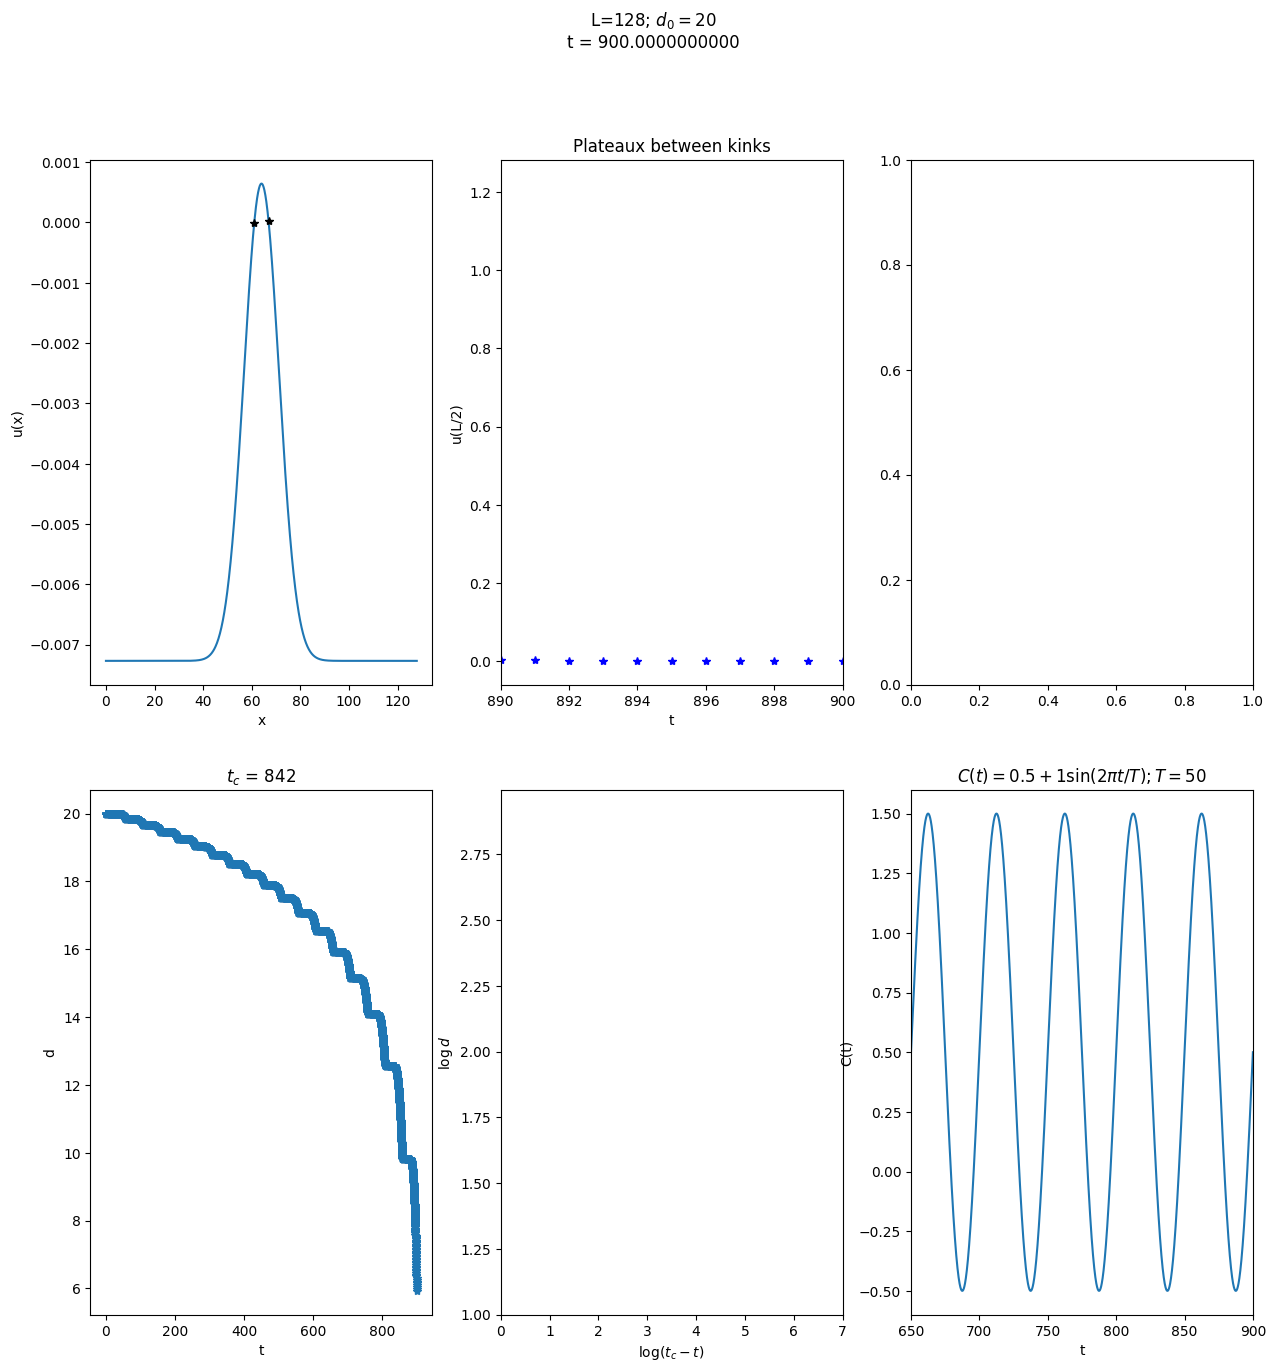

In [16]:
fig

In [17]:
!0'

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [18]:
import imageio
import numpy as np
import os
J = int(round(1000/1))
dir = "./.snapshots/"
#dir = "./.snapshots/"+simul_name+"/"
images = []
Jmax = J-1
for j in np.arange(0,Jmax+1):
    if j > 799 and j < 840:
        filename = dir+str(j)+".png"
        if os.path.isfile(filename):
            images.append(imageio.imread(filename))
        print(j)
imageio.mimsave(dir+"/00movie.gif", images, duration=5)

800
801
802


/tmp/ipykernel_18921/4145206425.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
